# Research of advertisements for the sale of apartments

At your disposal is the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

###### Data Description
- `airports_nearest` — distance to the nearest airport in meters (m)
- `balcony` — number of balconies
- `ceiling_height` — ceiling height (m)
- `cityCenters_nearest` — distance to city center (m)
- `days_exposition` — how many days the ad was posted (from publication to removal)
- `first_day_exposition` — publication date
- `floor` — floor
- `floors_total` — total floors in the house
- `is_apartment` — apartments (boolean)
- `kitchen_area` — kitchen area in square meters (m²)
- `last_price` — price at the time of removal from publication
- `living_area` — living area in square meters (m²)
- `locality_name` — locality name
- `open_plan` — free layout (boolean type)
- `parks_around3000` — number of parks within a 3 km radius
- `parks_nearest` — distance to nearest park (m)
- `ponds_around3000` — number of water bodies within a radius of 3 km
- `ponds_nearest` — distance to the nearest body of water (m)
- `rooms` — number of rooms
- `studio` — studio apartment (boolean)
- `total_area` — apartment area in square meters (m²)
- `total_images` — number of photos of the apartment in the ad

## Examining data from a file

In [1]:
# first you need to import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the file and set the delimiter for readability
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#display the first 10 lines of the dataframe for review
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#examine general information about the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#and display information about the number of rows and columns
df.shape

(23699, 22)

### Conclusion

###### Based on the primary analysis of the data, the following conclusions can be drawn:
1. Dataframe has `23699 rows and 22 columns`
2. It is necessary to replace data types:
- `first_day_exposition` cast to `datetime` type instead of object
- `floors_total` and `balcony` cast to int type, since their number cannot be a fractional number
- `is apartment` must be cast to bool instead of object
3. You need to lower and snake case the name of the column `cityCenters_nearest`, but just to snake case the names of the columns `parks_around3000` and `ponds_around3000`.
4. There are a lot of gaps in the dataframe. We will deal with them when preprocessing the data.

## Data preprocessing

### Rename columns

In [6]:
#start simple: rename the column names
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'})
#check the result
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Replacement of passes

Before changing data types in columns, you need to deal with gaps in them, otherwise the program will generate an error.

In [7]:
#display general information about passes
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

There are gaps in more than half of the columns. We will replace them in those columns that we need for analysis and will affect the results of the study.

#### Ceiling height

In [8]:
# let's see what values are in this column
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

As you can see, in this column, in addition to gaps, there are also anomalous values, including both 1 meter and 100 meters.
According to building codes, ceiling heights cannot be lower than 2.5 meters, and it turns out that values ​​below 2.5 meters are incorrect, as well as values more than 6 meters (duplex penthouse). These outliers are best replaced by medians.

In [9]:
#let's see the number of such anomalous values
len(df.query('ceiling_height < 2.5 or ceiling_height > 6'))

102

In [10]:
#check the median
display(df['ceiling_height'].median())
#and replace gaps with median ceiling heights
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

2.65

#### Number of floors in the house

There are a small number of values missing in this column, 86 in total.

In [11]:
#look at the average, minimum and maximum values
display(df['floors_total'].median())
df['floors_total'].describe()

9.0

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [12]:
#display the first 10 lines to see on which floors of the apartment, 
#in which the values of the number of storeys of the house are missing
display(df[df['floors_total'].isna()].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.65,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.65,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.65,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.65,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.65,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


As we can see, we have floors that are above the average / median, so replacing all the gaps with average / median values will not work.

In [13]:
#fill in the gaps with the most popular floors of houses based on the floor where the apartment is located
df.loc[(df['floors_total'].isna()) & (df['floor'] <=5), 'floors_total'] = 5
df.loc[(df['floors_total'].isna()) & (df['floor'] > 5)&(df['floor'] <=9), 'floors_total'] = 9
df.loc[(df['floors_total'].isna()) & (df['floor'] > 9)&(df['floor'] <=12),'floors_total'] = 12
df.loc[(df['floors_total'].isna()) & (df['floor'] > 12)&(df['floor'] <=16),'floors_total'] = 16
df.loc[(df['floors_total'].isna()) & (df['floor'] > 16)&(df['floor'] <=25),'floors_total'] = 25
#check the number of gaps in this column
df['floors_total'].isna().sum()

0

As you can see, all the gaps have been replaced.

#### Living area and kitchen area

Gaps in these columns will be filled with medians based on the total area of the apartment and the number of rooms in it.

In [14]:
#first for living space
#here we will have to enter a temporary variable, which we will delete after replacing the gaps
df['temp_living'] = df['living_area']/df['total_area']
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['temp_living'].transform('median'))
#check the number of passes
df['living_area'].isna().sum()

0

In [15]:
#now do the same with the kitchen area
df['temp_kitchen'] = df['kitchen_area']/df['total_area']
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['temp_kitchen'].transform('median'))
#check the number of passes
df['kitchen_area'].isna().sum()

197

We have 197 passes left. Let's see what these lines are and why they remained.

In [16]:
df.loc[df['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,temp_living,temp_kitchen
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.500000,2,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,0.574074,NaN
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.000000,1,NaN,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0.680000,NaN
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.750000,4,NaN,...,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,0.912947,NaN
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.300000,19,NaN,...,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,0.706395,NaN
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,0.689655,7,NaN,...,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.000000,16,NaN,...,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,0.692308,NaN
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.000000,4,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.649819,NaN
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,0.689655,8,NaN,...,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,NaN,NaN
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.000000,8,NaN,...,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,0.620690,NaN


Based on the data, there were lines with gaps in those apartments where the area is small and the number of rooms is zero. Apparently these are studios and a small part of the apartments in which the sellers did not indicate that they were studios and in which there is no dedicated kitchen and almost the entire area is residential. Let's replace the remaining values with zeros.

In [17]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [18]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
#check the number of passes again
df['kitchen_area'].isna().sum()

0

In [19]:
#and delete unnecessary columns that were introduced to replace the data
df.drop(columns = ['temp_kitchen', 'temp_living'],axis = 1,inplace=True)

#### Apartments

This column contains 20924 gaps. Let's check what values are in this column.

In [20]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

There are only two values in this column, True and False, and apparently such a number of gaps were formed because the checkbox was not put in the ad that this is an apartment, and therefore all the gaps are False. Translating this column to a Boolean type will help resolve the issue with gaps.

In [21]:
df['is_apartment'] = df['is_apartment'].astype(bool)

In [22]:
#check the number of gaps in this column
df['is_apartment'].isna().sum()

0

#### Balconies

Let's check what values are in the column with balconies.

In [23]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In the column with balconies, 11,519 values are missing, which is almost half of all values. Here, most likely, the problem arose by analogy with the apartments, which did not indicate the presence of a balcony, because there is none. Therefore, we replace the missing values with zeros.

In [24]:
df['balcony'] = df['balcony'].fillna(0)
#check the number of remaining passes
df['balcony'].isna().sum()

0

#### Locality name

In [25]:
#check what values are in the column
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [26]:
df['locality_name'] =df['locality_name'].str.replace('ё', 'е').str.lower()

In [27]:
replace_words = ['поселок ', 'деревня ','село ', 'городского типа ',
                 'садоводческое некоммерческое товарищество ', 'садовое товарищество ',
                 'городской ','коттеджный ',' пансионат ',
                 'при железнодорожной станции ']
for word in replace_words:
    df['locality_name'] = df['locality_name'].str.replace(word,'')

In this column, we have a total of 49 gaps, which is very insignificant and will not affect the results of the analysis. There is nothing to replace this data with, so these lines can be deleted.

In [28]:
df=df.dropna(subset=['locality_name'])

In [29]:
# and check for gaps
df['locality_name'].isna().sum()

0

#### Replacing gaps in other columns

The columns `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest` also have many gaps. But we have nothing to replace this data with, plus maybe they were not indicated, because there are no parks or reservoirs near the apartment for sale, and the distance to the center is very large and it makes no sense to indicate it. We do not need these data for analysis, so we will leave gaps in them.

With the `days_exposition` column, everything is more complicated, we need it for analysis, but how do we fill it? Yes, we have a date for posting an ad, but until what date do we count those days? Until today? Before the dataframe upload date we don't know? Let's leave the values as they are, we have nothing to replace them with.

### Replacing the data type

The apartment column has already been replaced with a boolean type, it remains to change the type from float64 to int64 in the `'floors_total', 'balcony' and 'city_centers_nearest'` columns, and cast the `'first_day_exposition'` column to the datetime type.

In [30]:
df[['floors_total', 'balcony',
    'city_centers_nearest']] = df[['floors_total',
                                   'balcony','city_centers_nearest']].astype('int32', errors='ignore')

In [31]:
#now cast first_day_exposition to datetime instead of object
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
#check that the data type conversion is correct
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [32]:
#check the data types in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Section Conclusion

1. Blanks have been replaced in `ceiling_height`, `floors_total`, `living_area`, `balcony` and `locality_name` columns.
2. Data types have been changed from float64 to int64 in `floors_total`, `balcony` and `city_centers_nearest` columns.
3. The `is_apartment` column has been cast to a boolean.
4. The `first_day_exposition` column has been cast to datetime.

## Calculations and adding results to the table

### Price per square meter

Let's add a column with the price per square meter. To do this, you need to divide the cost of the apartment by the total area.

In [33]:
df['square_meter'] = df['last_price'] /df['total_area']

### Day of the week, month and year of publication of the announcement

Let's add separate columns with the day, month and year of publication of the announcement. To do this, we use the datetime.

In [34]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [35]:
#rename the column with the days of the week for readability
df['weekday'] = df['weekday'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',
                                       3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})

### Apartment floor

Let's create a function that will assign categories to the floors: first, last, other.

In [36]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'First'
    elif row['floor'] == row['floors_total']:
        return 'Last'
    return 'Other'
    
df['floor_category'] = df.apply(floor_cat, axis=1)

### Area ratio

Let's add columns with the ratio of the total area and living area, as well as the ratio of the kitchen area to the total area.

In [37]:
df['ratio_living'] = df['living_area']/df['total_area']
df['ratio_kitchen'] = df['kitchen_area']/df['total_area']

Let's check that all columns have been successfully added to our dataframe.

In [38]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,square_meter,weekday,month,year,floor_category,ratio_living,ratio_kitchen
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,2.0,755.0,NaN,120370.370370,Thursday,3,2019,Other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,True,...,0.0,NaN,81.0,82920.792079,Tuesday,12,2018,First,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,2.0,574.0,558.0,92785.714286,Thursday,8,2015,Other,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,0.631667,9,True,...,3.0,234.0,424.0,408176.100629,Friday,7,2015,Other,0.003973,0.000809
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1.0,48.0,121.0,100000.000000,Tuesday,6,2018,Other,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,True,...,NaN,NaN,55.0,95065.789474,Monday,9,2018,Other,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,True,...,0.0,NaN,155.0,99195.710456,Thursday,11,2017,Other,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,0.585009,22,True,...,0.0,NaN,NaN,110544.692737,Thursday,4,2019,Other,0.008171,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,True,...,NaN,NaN,189.0,87454.764777,Wednesday,5,2018,Other,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,True,...,0.0,NaN,289.0,88524.590164,Sunday,2,2017,Other,0.714754,0.106557


## Exploratory data analysis

### To begin with, we will study the following parameters: area, price, number of rooms, ceiling height, sale terms and build histograms for each parameter.

###### Total area

In [39]:
#display descriptive statistics for the `total_area` column
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Let's start with a box plot to estimate the outliers.

(0.0, 400.0)

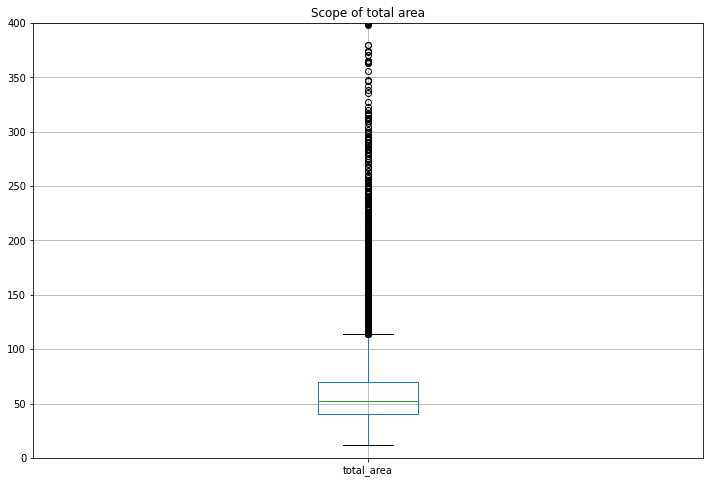

In [40]:
df.boxplot('total_area', figsize=(12,8)).set_title('Scope of total area')
plt.ylim(0, 400)

In [41]:
print('99 quantile:', df['total_area'].quantile(0.99))

99 quantile: 197.55699999999888


As you can see, the average value is around 60 sq.m., the median is about 50 sq.m., the minimum value is 12 sq.m (probably a room), the maximum is 900 (it looks implausible). Emissions start at about 120 sqm, but the 99th quantile is at around 197 sqm, so let's look at apartments up to 200 sqm. on the histogram.

Text(0.5, 1.0, 'Total area')

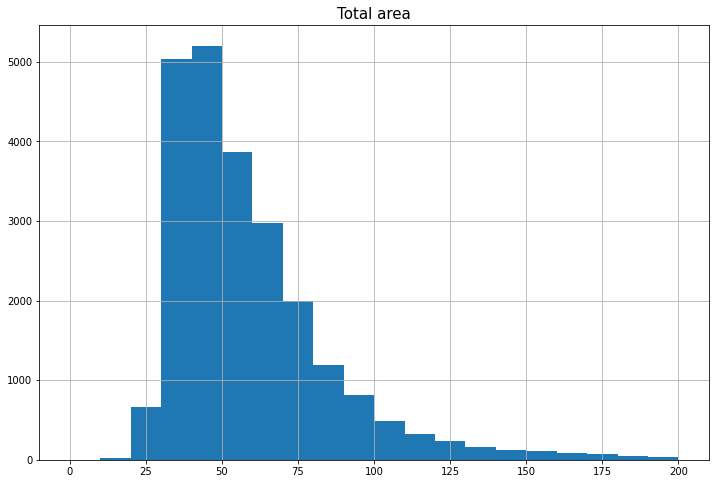

In [42]:
df.hist('total_area', bins=20, range = (0, 200), figsize=(12,8))
plt.title('Total area', fontsize=15)

All findings are consistent with the findings from the Span Diagram and most ads from 30 to 60 sq.m.

###### Цена

In [43]:
#display descriptive statistics for the `last_price` column
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(0.0, 50000000.0)

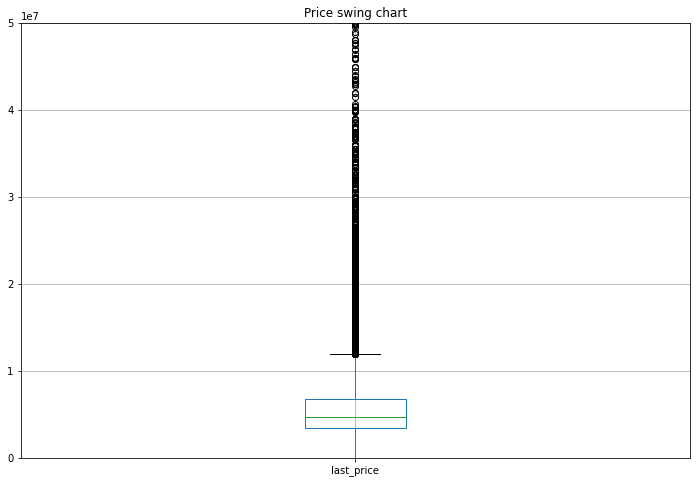

In [44]:
df.boxplot('last_price', figsize=(12,8)).set_title('Price swing chart')
plt.ylim(0, 50000000)

In [45]:
print('99 quantile:', df['last_price'].quantile(0.99))

99 quantile: 36000000.0


It can be seen from the diagram that most of the values lie in the range from 3 to 12 million. Emissions start from 12 million. But we are considering apartments with an area of up to 200 sq.m., and the 99th quintile is at around 36 million, so we will consider apartments up to this value.

Text(0.5, 1.0, 'Price')

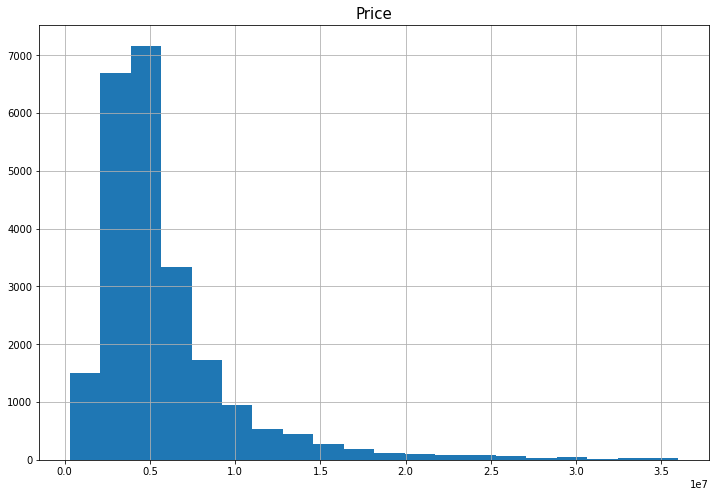

In [46]:
df['last_price'].hist(bins=20, range = (300000, 36000000), figsize=(12,8))
plt.title('Price', fontsize=15)

As you can see from the bar chart, most of the ads are in the range from 3 to 6 million ads.

###### Number of rooms

In [47]:
#display descriptive statistics for the `rooms` column
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Number of rooms')

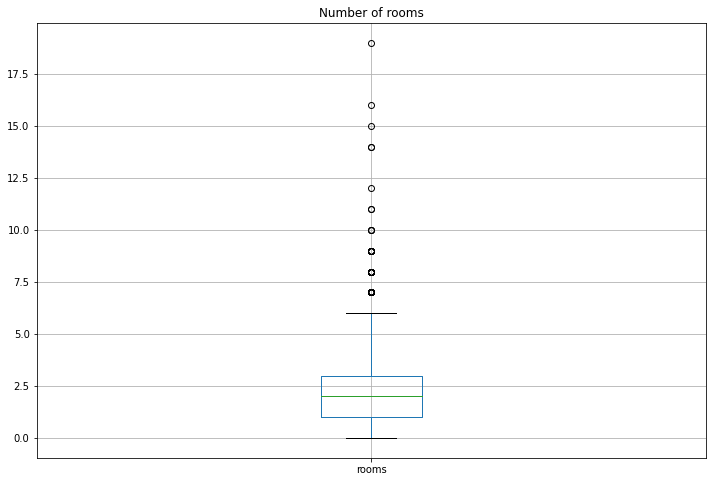

In [48]:
df.boxplot('rooms', figsize=(12,8)).set_title('Number of rooms')

In [49]:
print('99 quantile:', df['rooms'].quantile(0.99))

99 quantile: 5.0


You can see from the diagram that emissions start after 6 rooms and I agree with that. Therefore, we will build a histogram in the range from 0 to 6 rooms.

Text(0.5, 1.0, 'Number of rooms')

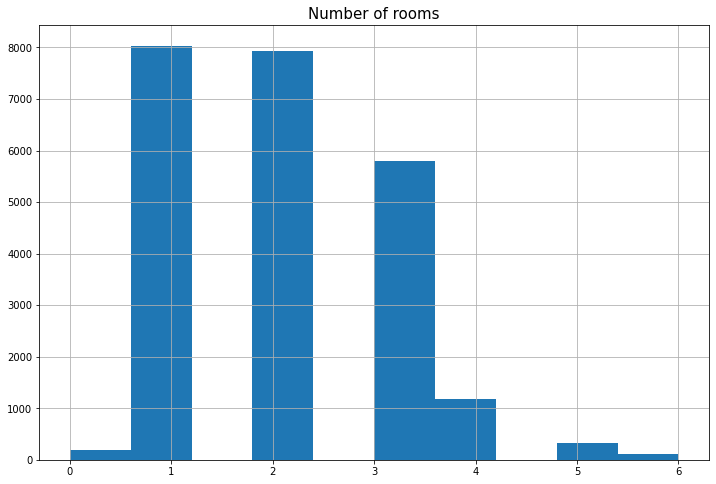

In [50]:
df['rooms'].hist(bins=10, range = (0, 6), figsize=(12,8))
plt.title('Number of rooms', fontsize=15)

The histogram shows that they sell mainly 1-3 room apartments.

###### Ceiling height

In [51]:
#as always, display descriptive statistics for the `ceiling height` column
df['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

During pre-processing, we determined that we would consider ceilings with a height of 2.5 to 6 meters. Let's build a diagram.

(2.0, 8.0)

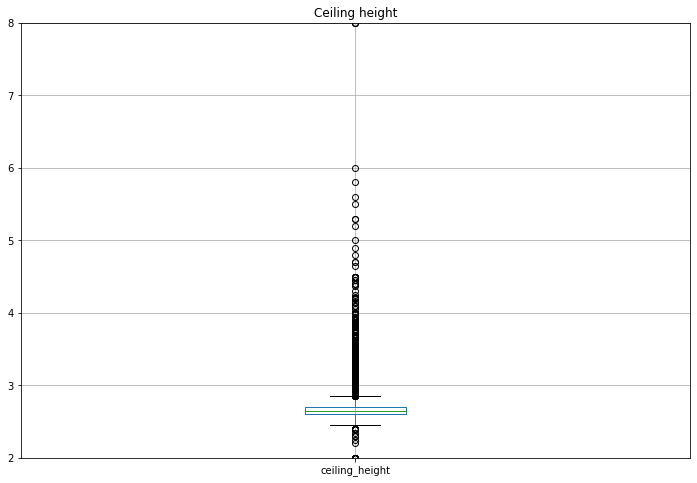

In [52]:
df.boxplot('ceiling_height', figsize=(12,8)).set_title('Ceiling height')
plt.ylim(2, 8)

In [53]:
print('99 quantile:', df['ceiling_height'].quantile(0.99))

99 quantile: 3.6


It can be seen from the diagram that most of the values are in the range from 2.65 to 2.75 meters. From 3 meters, the diagram considers the data to be outliers, but we will consider them.

Text(0.5, 1.0, 'Ceiling height')

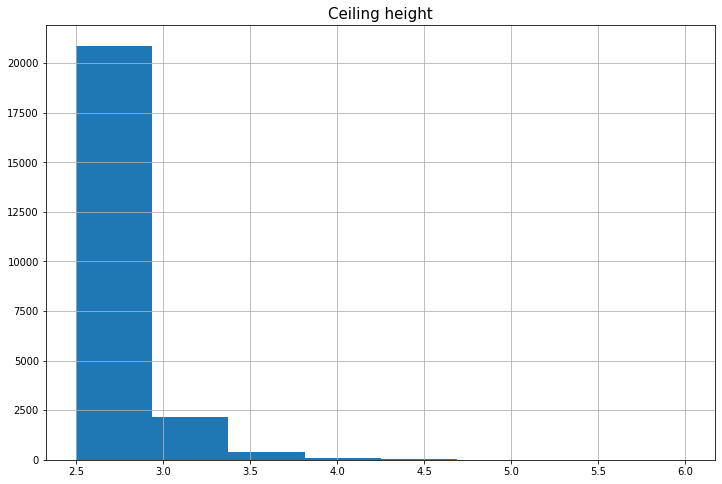

In [54]:
df['ceiling_height'].hist(bins=8, range = (2.5, 6), figsize=(12,8))
plt.title('Ceiling height', fontsize=15)

There are practically no positions over 3.5 meters.

###### Apartment sale time

In [55]:
#display descriptive statistics for the `days_exposition` column
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Apartment sale time')

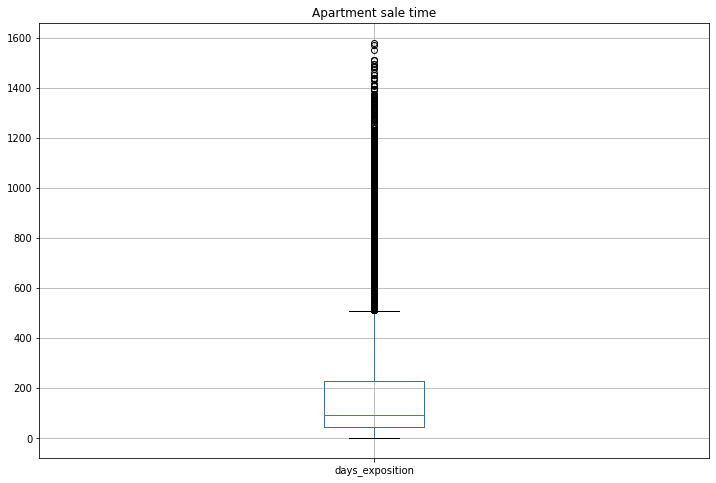

In [56]:
df.boxplot('days_exposition', figsize=(12,8)).set_title('Apartment sale time')

In [57]:
print('99 quantile:', df['days_exposition'].quantile(0.99))

99 quantile: 1069.0


The chart shows that the median is 95 days, the average time to sell is 180 days. More than 500 days is already considered an outlier, but we will consider values up to the 99th quantile - 1069 days.

Text(0.5, 1.0, 'Apartment sale time')

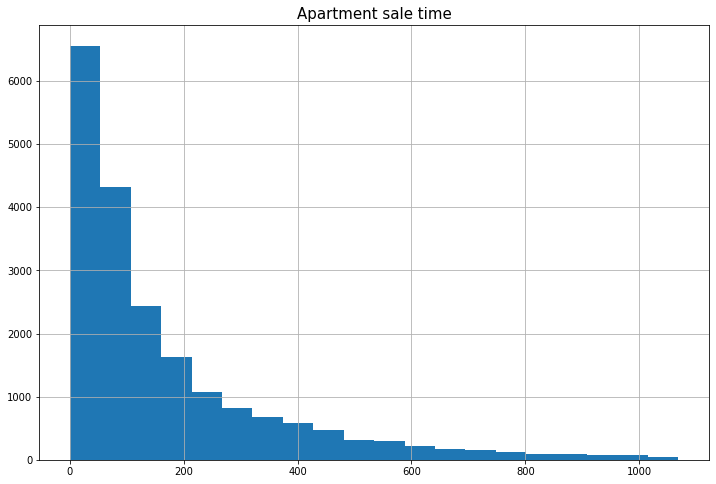

In [58]:
df['days_exposition'].hist(bins=20, range = (0, 1069), figsize=(12,8))
plt.title('Apartment sale time', fontsize=15)

Most of the apartments are sold in 3 months, the remaining apartments are mostly sold up to six months. In the rest of the ads, either the price of the apartments is too high, or the ads were forgotten to be removed after the sale. Plus, luxury real estate has a fairly long sale period.

###### The results of the study of the area, cost, number of rooms, ceiling heights, time of sale of the apartment
1. Total area:
- average value of the area = 60 sq.m.
- median value of the area = 50 sq.m.
- minimum area value = 12 sq.m. (most likely a room in a communal apartment or studio)
- premises with an area of more than 200 sq.m. in the framework of this study, we will consider an outlier
2. Property price:
- average cost = 6.5 million.
- median cost = $4.65 million
- minimum cost = 12 190
- real estate cheaper than 300,000 in the framework of this study will be considered an outlier
- real estate more expensive than 36 million in the framework of this study will be considered an outlier
3. Number of rooms:
- average number of rooms = 2
- median number of rooms = 2
- minimum number of rooms = 0 (studios)
- the number of rooms more than 6 in the framework of this study will be considered an outlier
4. Ceiling height:
- average height = 2.72 m
- median height = 2.65 m
- ceiling height less than 2.5 m in the framework of this study will be considered an outlier
- a ceiling height of more than 6 m in the framework of this study will be considered an outlier
5. Time of sale of the apartment:
- average time = 180 days
- median = 95 days
- the minimum sale period is 1 day
- the sale period of more than 1069 days in the framework of this study will be considered an outlier

###### Data filtering

Let's create an updated dataframe with new parameters, from which we will exclude outliers.

In [59]:
df_filtered = df.query('(total_area <= 200)'
                       'and (300000 <= last_price <= 36000000)'
                       'and (rooms <= 6)'
                       'and (2.5 <= ceiling_height <= 6)'
                       'and (days_exposition <= 1069)')

In [60]:
#check that the data is filtered
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19905 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19905 non-null  int64         
 1   last_price            19905 non-null  float64       
 2   total_area            19905 non-null  float64       
 3   first_day_exposition  19905 non-null  datetime64[ns]
 4   rooms                 19905 non-null  int64         
 5   ceiling_height        19905 non-null  float64       
 6   floors_total          19905 non-null  float64       
 7   living_area           19905 non-null  float64       
 8   floor                 19905 non-null  int64         
 9   is_apartment          19905 non-null  bool          
 10  studio                19905 non-null  bool          
 11  open_plan             19905 non-null  bool          
 12  kitchen_area          19905 non-null  float64       
 13  balcony         

### Factors affecting the cost of an apartment

We will study whether the price of an apartment depends on the area, number of rooms, distance from the center. We will study the dependence of the price on which floor the apartment is located on: first, last or another. We will also study the dependence on the placement date: day of the week, month and year.

#### Let's check the correlation of the cost of an apartment with its area.

In [61]:
df_filtered['total_area'].corr(df_filtered['last_price'])

0.7748644251350614

The correlation at 0.77 indicates a high correlation between area and price. Let's build a diagram.

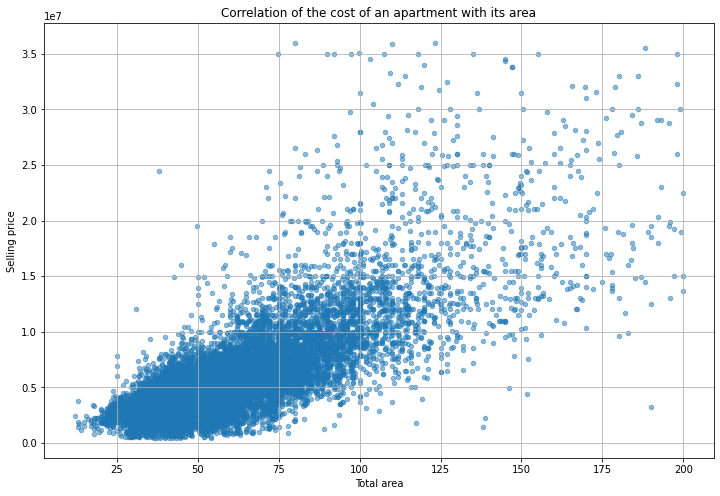

In [62]:
df_filtered.plot(x='total_area',
                 y='last_price',
                 kind='scatter',
                 style='o',
                 grid=True,
                 alpha=0.5,
                 figsize=(12, 8))
plt.title('Correlation of the cost of an apartment with its area', fontsize=12)
plt.xlabel('Total area')
plt.ylabel('Selling price')
plt.show()

Based on the diagram, the relationship between area and price can also be traced, and in most cases, with an increase in area, the value of real estate also increases.

#### Let's check the correlation of the cost of an apartment with the number of rooms.

In [63]:
df_filtered['rooms'].corr(df_filtered['last_price'])

0.4840335418125028

Here, the correlation coefficient is no longer so large, because the sample contains studios, as well as Euro-format apartments, where the rooms are small, but there is a kitchen-living room. For clarity, let's build a diagram from the pivot table, since we have only 6 values \u200b\u200bin the abscissa axis here and the scatter scatter diagram is not very visual.

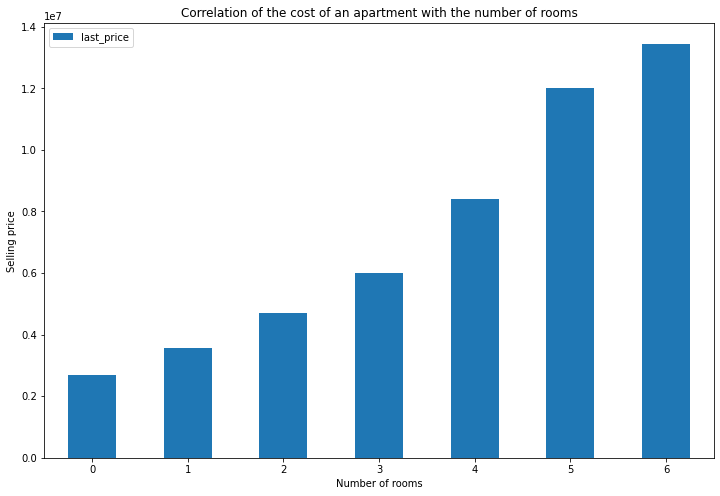

In [64]:
df_filtered.pivot_table(index ='rooms', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Correlation of the cost of an apartment with the number of rooms', fontsize=12)
plt.xlabel('Number of rooms')
plt.ylabel('Selling price')
plt.show()

From the diagram, the relationship between the number of rooms and the price can be traced, but not as clearly as with the area.

#### Let's check the correlation of the cost of an apartment with the distance from the center.

First you need to filter only those data where there is a distance to the center and it does not exceed 30 km.

In [65]:
df_center = df_filtered.query('0 < city_centers_nearest <= 30000')

In [66]:
df_center['city_centers_nearest'].corr(df_center['last_price'])

-0.3988355309360868

We see that the correlation is negative, that is, the price decreases as we move away from the center. However, it is still not high and the distance to the center does not have a significant impact on the cost of the apartment. Let's build a diagram.

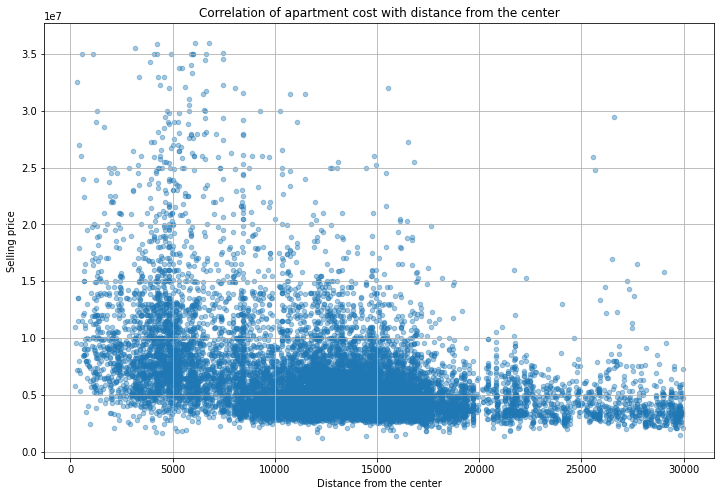

In [67]:
df_center.plot(x='city_centers_nearest',
               y='last_price',
               kind='scatter',
               style='o',
               grid=True,
               alpha=0.4,
               figsize=(12, 8))
plt.title('Correlation of apartment cost with distance from the center', fontsize=12)
plt.xlabel('Distance from the center')
plt.ylabel('Selling price')
plt.show()

There is a relationship between the price of an apartment and the distance to the center, but it is not as great as with the area of an apartment, for example.

#### Dependence of the price on the floor

Here we will also look at the correlation between floor and price based on a pivot table.

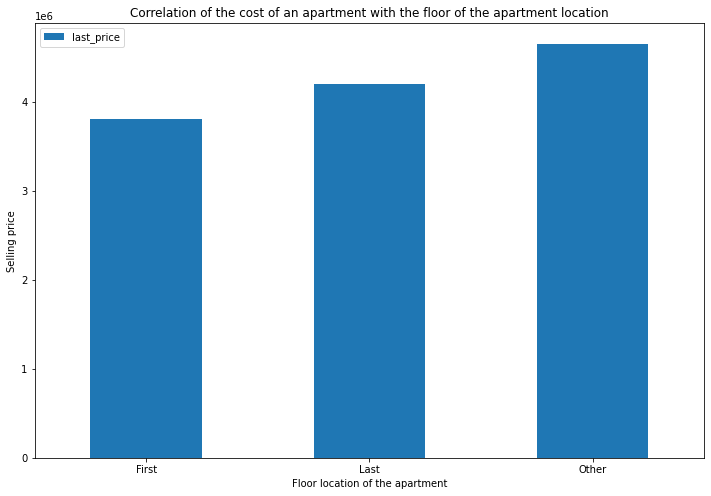

In [68]:
df_filtered.pivot_table(index ='floor_category', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Correlation of the cost of an apartment with the floor of the apartment location', fontsize=12)
plt.xlabel('Floor location of the apartment')
plt.ylabel('Selling price')
plt.show()

As you can see, there is a slight dependence, and the first and last floors are cheaper than all the floors between them.

#### Relationship between price and placement date.

Let's use the pivot table method.

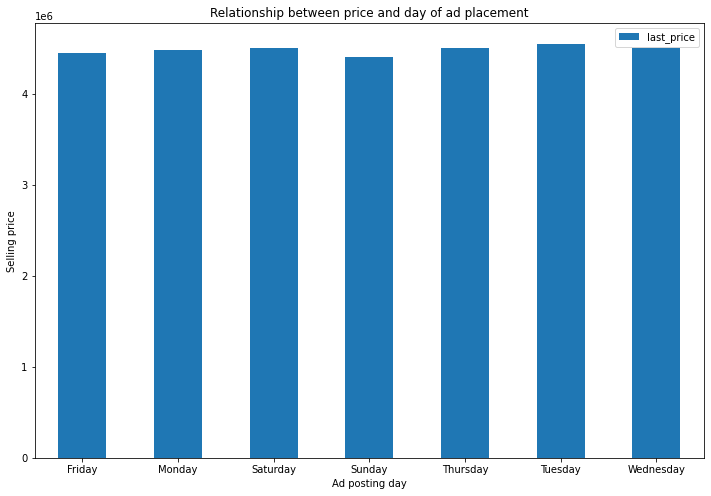

In [69]:
df_filtered.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Relationship between price and day of ad placement', fontsize=12)
plt.xlabel('Ad posting day')
plt.ylabel('Selling price')
plt.show()

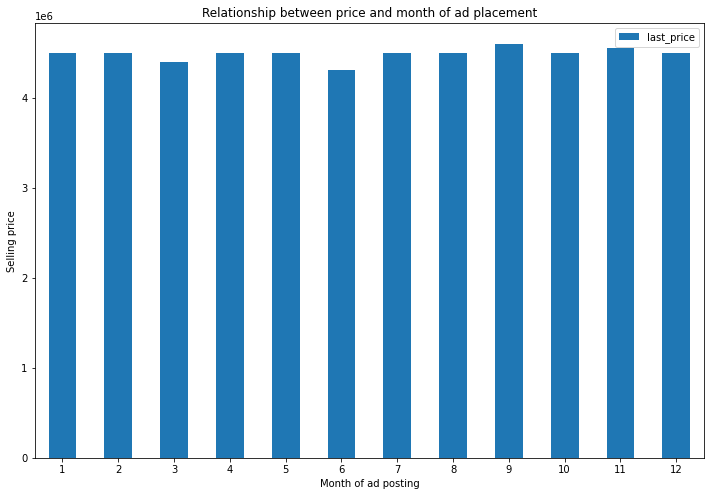

In [70]:
df_filtered.pivot_table(index ='month', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Relationship between price and month of ad placement', fontsize=12)
plt.xlabel('Month of ad posting')
plt.ylabel('Selling price')
plt.show()

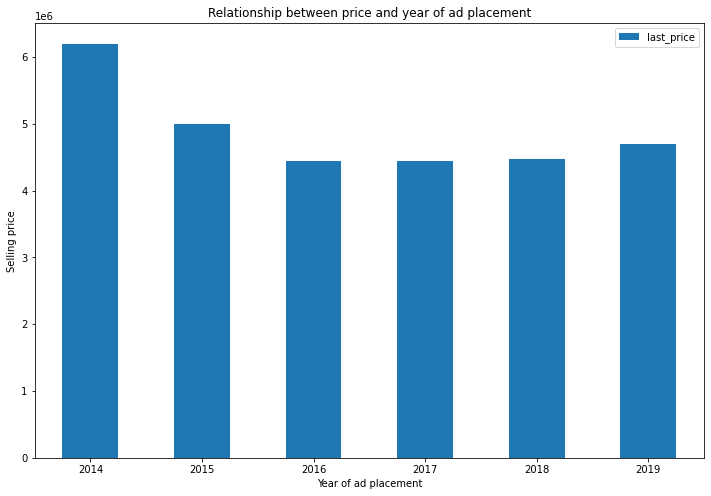

In [71]:
df_filtered.pivot_table(index ='year', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Relationship between price and year of ad placement', fontsize=12)
plt.xlabel('Year of ad placement')
plt.ylabel('Selling price')
plt.show()

As you can see, there is no special relationship between the price and the date of placement. You can observe small seasonal bursts in the cost of apartments in autumn and winter, as well as a slight increase in the value of real estate in 2019.

#### Conclusion on the factors affecting the cost of the apartment.

1. The greatest influence on the cost of an apartment is its area, the correlation level is 77%.
2. The number of rooms also affects the cost of the apartment, but this is due to the fact that an increase in the number of rooms in the apartment also leads to an increase in the total area of the apartment.
3. There is a relationship between the price of an apartment and the distance to the center, but it is not so great and the distance to the center does not have a significant impact on the cost of the apartment.
4. There is a slight dependence between the floor of the apartment location and its cost, and the first and last floors are cheaper than all the floors between them, but this dependence is not significant.
5. The day the ad is posted does not affect the price of the apartment.
6. When analyzing the dependence of the cost of an apartment on the month the ad was placed, there is a slight connection, but it is connected mainly with seasonality, when real estate becomes cheaper in summer, and more expensive in autumn and winter.
7. The year of placement of the ad affects the cost, because. real estate prices change from year to year and in 2016 there was a decrease in value compared to 2015, then the price was approximately at the same level and in 2019 it increased again.

### 10 locations with the most ads

Let's choose 10 settlements with the largest number of ads. Let's calculate the average price per square meter in these settlements.

In [72]:
local_pivot = df_filtered.pivot_table(index='locality_name', values='square_meter', aggfunc=['mean', 'count'])\
.round().astype('int32')
local_pivot.columns = ['mean_square', 'count']
local_pivot.sort_values('count', ascending=False).head(10)

,mean_square,count
locality_name,,
санкт-петербург,108964,13171
мурино,85777,547
кудрово,94374,437
шушары,77964,407
всеволожск,68594,337
колпино,74720,304
парголово,89622,299
пушкин,102173,297
гатчина,67938,267


As expected, most ads are in St. Petersburg, then in the settlements of Murino and Shushary. There are 24 times more ads in St. Petersburg than in Murino, which follows it.

Let's single out the settlements with the highest and lowest cost of housing. Let's filter the table so that it doesn't include the string with the name "none", which appeared after the replacement of gaps.

In [73]:
local_pivot.sort_values('mean_square', ascending=False).head(10)

,mean_square,count
locality_name,,
лисий нос,113728,2
зеленогорск,111332,21
санкт-петербург,108964,13171
пушкин,102173,297
сестрорецк,101621,161
левашово,96998,1
мистолово,96157,9
кудрово,94374,437
парголово,89622,299


As we can see, the highest cost is in the village of Lisiy Nos, Zelenogorsk and St. Petersburg.

In [74]:
local_pivot.sort_values('mean_square', ascending=True).head(10)

,mean_square,count
locality_name,,
старополье,11206,3
станции свирь,11481,2
вахнова кара,11688,1
выскатка,12335,2
совхозный,12629,2
малая романовка,12725,1
тесово-4,12931,1
ям-тесово,13712,2
житково,14956,2


Well, the lowest cost of a meter is in the village of Staropolye, the village of the Svir station and the village of Vakhnova Kara. In them, the average cost of a meter is only 11,500 rubles.

### Determination of the boundaries of the center of St. Petersburg

To begin with, let's save the dataframe, in which we add a slice for St. Petersburg and the distance to the center is greater than zero.

In [75]:
df_spb = df_filtered.query('locality_name == "санкт-петербург" and city_centers_nearest > 0').reset_index(drop=True)

Let's add a column with the rounded distance to the center in kilometers.

In [76]:
df_spb['dist_to_center'] = round(df_spb['city_centers_nearest'] / 1000).astype('int32')

In [77]:
# check that everything is correct
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter,weekday,month,year,floor_category,ratio_living,ratio_kitchen,dist_to_center
0,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,574.0,558.0,92785.714286,Thursday,8,2015,Other,0.612500,0.148214,14
1,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,48.0,121.0,100000.000000,Tuesday,6,2018,Other,0.320000,0.410000,8
2,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,True,...,NaN,289.0,88524.590164,Sunday,2,2017,Other,0.714754,0.106557,15
3,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,True,...,553.0,137.0,127525.252525,Thursday,11,2017,Other,0.512626,0.214646,14
4,16,4650000.0,39.0,2017-11-18,1,2.65,14.0,20.5,5,True,...,296.0,19.0,119230.769231,Saturday,11,2017,Other,0.525641,0.194872,14


Let's calculate the average cost per square meter depending on the distance from the center.

In [78]:
df_spb.pivot_table(index='dist_to_center', values='square_meter', aggfunc='mean').head(10).round(2)

,square_meter
dist_to_center,
0,134923.03
1,134322.65
2,127276.50
3,111885.23
4,124986.14
5,131813.96
6,132779.17
7,133744.45
8,121723.14


And let's make a diagram.

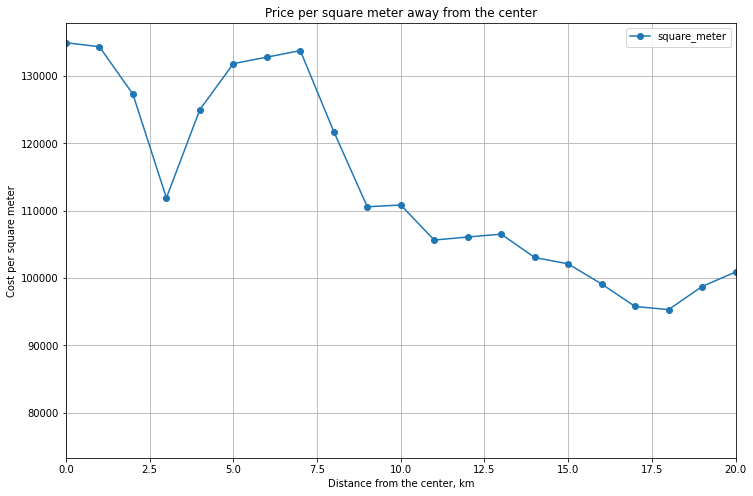

In [79]:
df_spb.pivot_table(index='dist_to_center', values='square_meter', aggfunc='mean')\
.plot(style='o-',figsize=(12, 8),xlim=(0, 20),grid=True)
plt.title('Price per square meter away from the center')
plt.xlabel('Distance from the center, km')
plt.ylabel('Cost per square meter')
plt.show()

As we can see, a sharp drop in the cost of a meter is observed at 3 km and 8 km distance from the center. A decrease in the cost by 3 km can be compared with a small number of ads and a spread in prices due to the fact that mainly apartments of a large area are exhibited, plus in different years (the price of a meter differs from year to year), but a sharp decrease in the cost by 8 kilometers indicates that the center ends there.

### Comparative analysis of apartments in the center of St. Petersburg

Let's analyze the center and study the following parameters: area, price, number of rooms, ceiling height. We also highlight the factors that affect the cost of an apartment (number of rooms, floor, distance from the center, date of placement of the announcement). Do they differ from the general findings throughout the city?

Let's create a filtered dataframe with a distance to the center of 8 kilometers.

In [80]:
df_spb_center = df_spb.query('dist_to_center <= 8').reset_index(drop=True)

Let's compare on the histogram two dataframes for St. Petersburg and only for the city center.

###### The first parameter for comparison is the total area. We will use histogram comparison.
- `histtype = 'step'` - this parameter is useful for comparing two histograms, the areas will not be filled in and the boundaries of the two histograms will be clearly visible
- `linewidth` - line width for better visibility
- `density = True` - allows you to display two histograms in the same coordinate system and make a visual comparison
- `ax = ax` - allows you to display two histograms on the same coordinate axis

<AxesSubplot:ylabel='Frequency'>

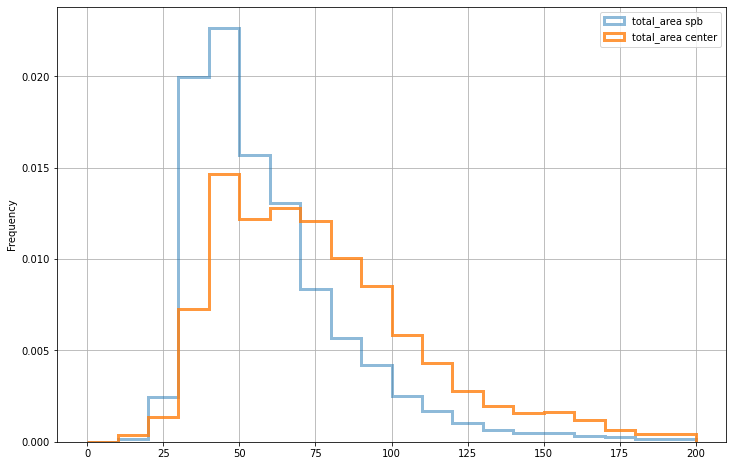

In [81]:
ax = df_spb.plot(kind = 'hist', y = 'total_area', histtype = 'step', bins = 20, range = (0, 200),
            alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'total_area' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'total_area', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 20, range = (0, 200), alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'total_area' + ' center')

As we can see from the comparative histogram, the average area of apartments in the center is about 45-50 sq.m., also in the center there are much fewer apartments of small area up to 40 sq.m. and more apartments from 70 sq.m.

###### The next parameter for comparison is price differences.

<AxesSubplot:ylabel='Frequency'>

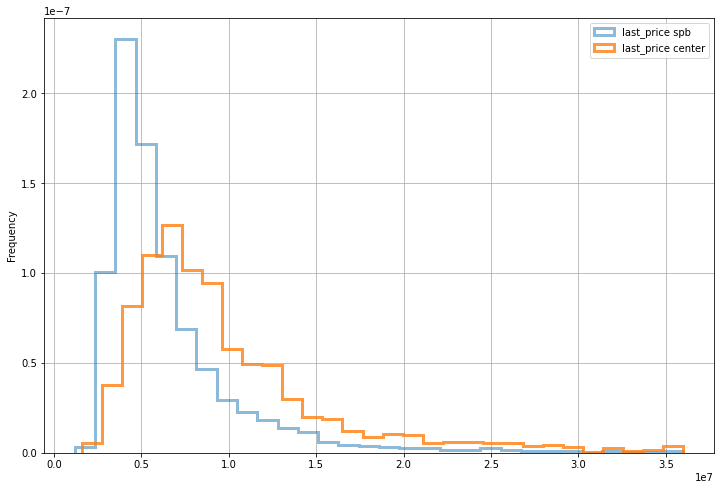

In [82]:
ax = df_spb.plot(kind = 'hist', y = 'last_price', histtype = 'step', bins = 30, 
                 alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'last_price' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'last_price', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 30, alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'last_price' + ' center')

From this histogram, it can be seen that in the center the price is higher than in the whole city and the average value of the cost is about 7 million rubles.

###### Number of rooms

<AxesSubplot:ylabel='Frequency'>

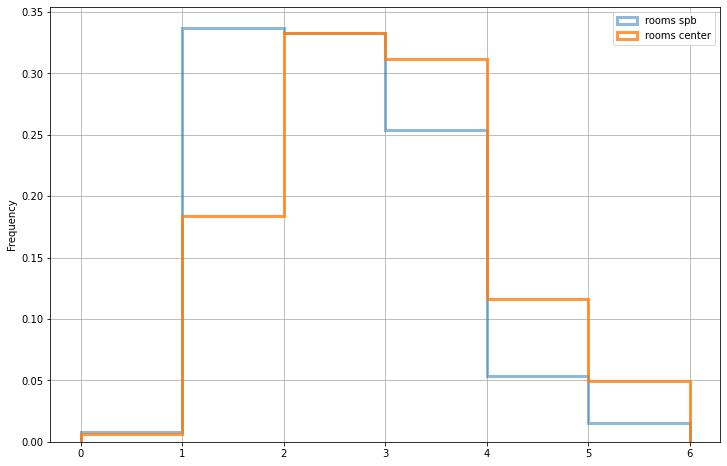

In [83]:
ax = df_spb.plot(kind = 'hist', y = 'rooms', histtype = 'step', bins = 6, 
                 alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'rooms' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'rooms', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 6, alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'rooms' + ' center')

Here we see that 2-4 room apartments predominate in the center, and there are 2 times fewer one-room apartments than in the rest of St. Petersburg.

###### Ceiling height

<AxesSubplot:ylabel='Frequency'>

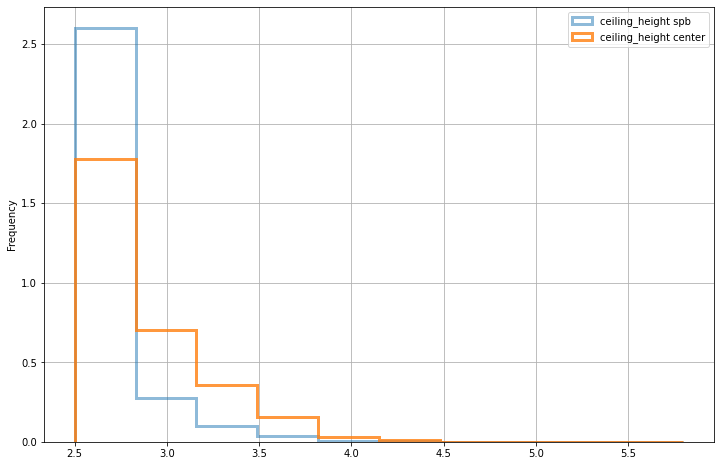

In [84]:
ax = df_spb.plot(kind = 'hist', y = 'ceiling_height', histtype = 'step', bins = 10, 
                 alpha = 0.5, linewidth = 3, grid = True, density = True, figsize=(12,8), label = 'ceiling_height' + ' spb')
df_spb_center.plot(kind = 'hist', y = 'ceiling_height', histtype = 'step', ax = ax, linewidth = 3,
                   bins = 10, alpha = 0.8, grid = True, density = True, figsize=(12,8),
                   label = 'ceiling_height' + ' center')

In terms of ceiling height in the center, ceilings 2.5-2.7 meters high also prevail, but at the same time, there are many times more apartments with a ceiling height of about 3 meters.

### Factors affecting the cost of apartments in the center of St. Petersburg

#### Number of rooms.

In [85]:
#check the correlation
df_spb_center['rooms'].corr(df_spb_center['last_price'])

0.4379121382537206

The correlation between the number of rooms and the cost is almost the same as throughout the dataframe.

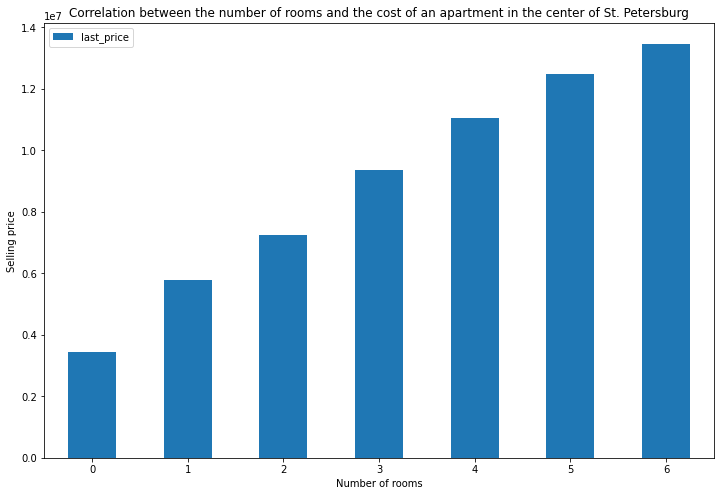

In [86]:
df_spb_center.pivot_table(index ='rooms', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Correlation between the number of rooms and the cost of an apartment in the center of St. Petersburg')
plt.xlabel('Number of rooms')
plt.ylabel('Selling price')
plt.show()

Yes, everything is the same as before, the cost of an apartment directly depends on the number of rooms, because the more rooms, the larger the area of the apartment.

#### Floor

Consider the correlation between floor and cost based on a pivot table.

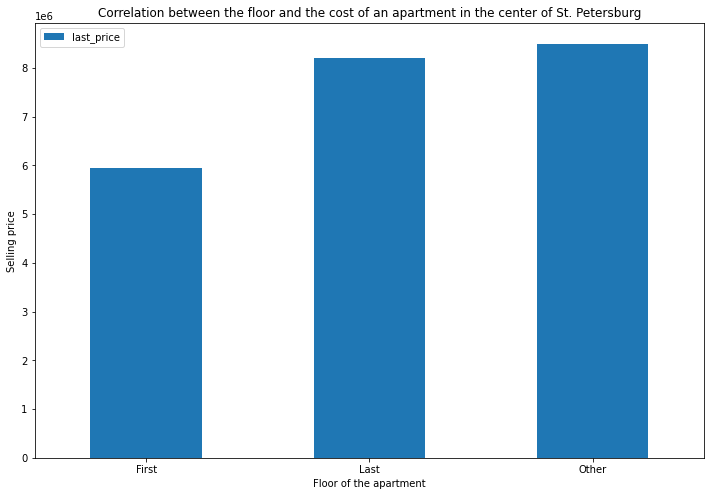

In [87]:
df_spb_center.pivot_table(index ='floor_category', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Correlation between the floor and the cost of an apartment in the center of St. Petersburg')
plt.xlabel('Floor of the apartment')
plt.ylabel('Selling price')
plt.show()

Here, in comparison with the main dataframe, a large dependence between the floor and the price is visible. So, in the center, there is a very big difference in price between the first floor and the rest, but the last floor, on the contrary, almost does not differ in price from other floors.

#### Distance from the center

Let's look at the correlation between distance from the center and the cost of an apartment.

In [88]:
df_spb_center['dist_to_center'].corr(df_spb_center['last_price'])

-0.10443156328915279

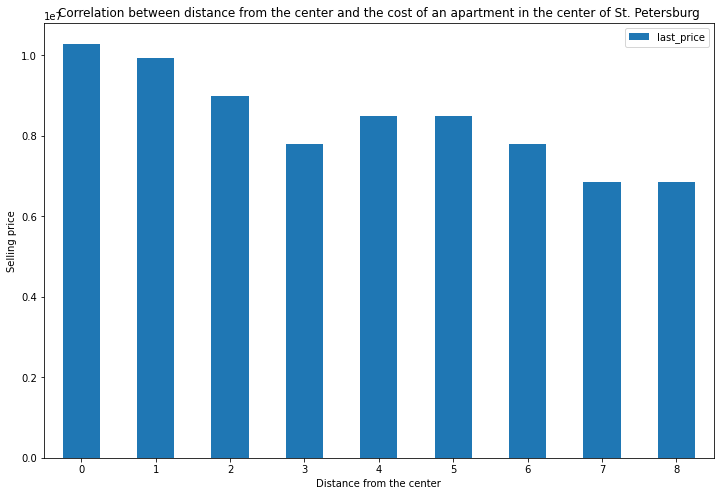

In [89]:
df_spb_center.pivot_table(index ='dist_to_center', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('Correlation between distance from the center and the cost of an apartment in the center of St. Petersburg')
plt.xlabel('Distance from the center')
plt.ylabel('Selling price')
plt.show()

Based on these data, we see that the correlation is almost zero, because the apartments in question are already located in the center and a few kilometers do not give much difference in price.

#### Date of ad posting

And the last parameter to study is the relationship between the date of placement of the ad and the cost.

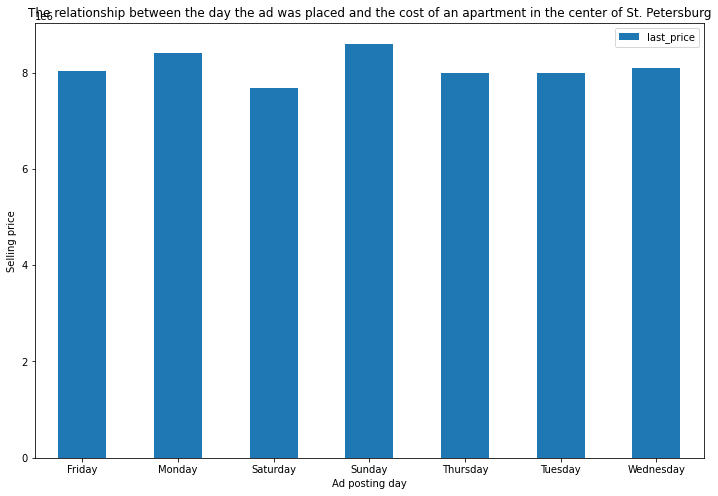

In [90]:
df_spb_center.pivot_table(index ='weekday', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('The relationship between the day the ad was placed and the cost of an apartment in the center of St. Petersburg')
plt.xlabel('Ad posting day')
plt.ylabel('Selling price')
plt.show()

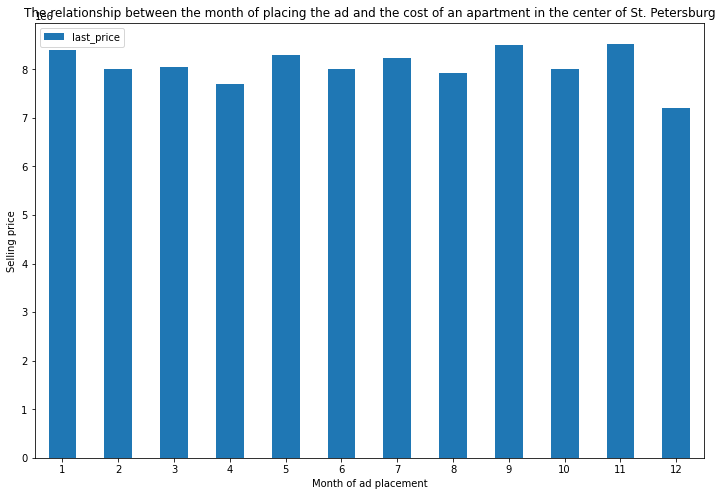

In [91]:
df_spb_center.pivot_table(index ='month', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('The relationship between the month of placing the ad and the cost of an apartment in the center of St. Petersburg')
plt.xlabel('Month of ad placement')
plt.ylabel('Selling price')
plt.show()

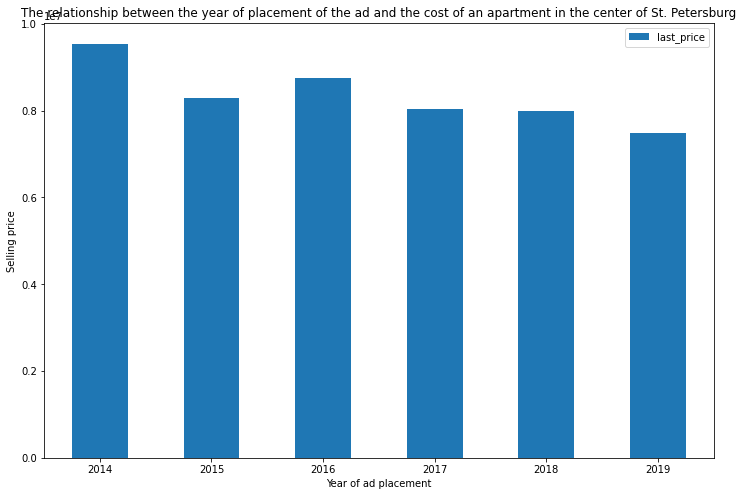

In [92]:
df_spb_center.pivot_table(index ='year', values = 'last_price', aggfunc= 'median')\
.plot( y = 'last_price', kind='bar', figsize=(12,8))
plt.xticks(rotation=0)
plt.title('The relationship between the year of placement of the ad and the cost of an apartment in the center of St. Petersburg')
plt.xlabel('Year of ad placement')
plt.ylabel('Selling price')
plt.show()

There are no special dependencies between the day/month/year of ad placement, as in the main dataframe.

### Section Conclusion

1. Most ads are posted in St. Petersburg, then in the settlements of Murino and Shushary. There are 24 times more ads in St. Petersburg than in Murino, which follows it. The highest cost per sq.m. in the village of Lisiy Nos, Zelenogorsk and St. Petersburg.
2. The area included in the center of St. Petersburg was defined with a radius of 8 km.
3. The average area of apartments in the center of St. Petersburg is approximately 45-50 sq.m., also in the center there are much fewer apartments of small area up to 40 sq.m. and more apartments from 70 sq.m.
4. In the center of St. Petersburg, the price is higher than in the city as a whole and the average cost of an apartment is about 7 million rubles.
5. In the center of St. Petersburg, 2-4 room apartments prevail, and one-room apartments are 2 times less than in the rest of the city.
6. In terms of ceiling height in the center of St. Petersburg, ceilings 2.5-2.7 meters high also prevail, but at the same time, there are many more apartments with a ceiling height of about 3 meters than in other parts of the city.
7. The price of apartments in the center of St. Petersburg is significantly affected by the number of rooms and the floor, but the distance of the apartment from the center and the date of placement of the advertisement do not have a special effect on the cost.

## General conclusion

1. There are 23699 rows and 22 columns in a dataframe. More than half of the columns have gaps.
2. During preprocessing, the gaps in the ceiling_height, floors_total, living_area, balcony, locality_name columns were replaced. The data types have been changed from float64 to int64 in the floors_total, balcony, and city_centers_nearest columns. The is_apartment column has been cast to a boolean. The first_day_exposition column has been cast to datetime.
3. Columns were added to the dataframe for analysis:
- price per square meter
- day of the week, month and year of ad placement
- categories were assigned to the floors
- added columns with the ratio of the total area and living area, as well as the ratio of the kitchen area to the total area.
4. The largest influence on the cost of an apartment throughout the dataframe is its area, the correlation level is 77%. The number of rooms also has an indirect impact on the cost of an apartment, but this is due to the fact that an increase in the number of rooms in an apartment also leads to an increase in the total area of ​​the apartment. There is a relationship between the price of an apartment and the distance to the center, but it is not large and the distance to the center does not have a significant impact on the cost of the apartment. There is a slight dependence between the floor of the apartment location and its cost, and the first and last floors are cheaper than all the floors between them, but this dependence is not significant. The day the ad is placed has no effect on the price of the apartment. When analyzing the dependence of the cost of an apartment on the month the ad was placed, there is a slight connection, but it is connected mainly with seasonality, when real estate becomes cheaper in summer and rises in price in autumn and winter. The year of placement of the ad affects the cost, because. real estate prices change from year to year and in 2016 there was a decrease in value compared to 2015, then the price was approximately at the same level and in 2019 it increased again.
5. Most ads are placed in St. Petersburg, then in the settlements of Murino and Shushary. There are 24 times more ads in St. Petersburg than in Murino, which follows it. The highest cost per sq.m. in the village of Lisiy Nos, Zelenogorsk and St. Petersburg. The area included in the center of St. Petersburg was defined with a radius of 8 km. The average area of apartments in the center of St. Petersburg is approximately 45-50 sq.m., also in the center there are much fewer apartments of small area up to 40 sq.m. and more apartments from 70 sq.m. In the center of St. Petersburg, the price is higher than in the city as a whole, and the average cost of an apartment is about 7 million rubles. In the center of St. Petersburg, 2-4 room apartments prevail, and one-room apartments are 2 times less than in the rest of the city. In terms of ceiling height in the center of St. Petersburg, ceilings 2.5-2.7 meters high also prevail, but at the same time, there are many more apartments with a ceiling height of about 3 meters than in other parts of the city. The price of apartments in the center of St. Petersburg is significantly affected by the number of rooms and the floor, but the distance of the apartment from the center and the date of placement of the announcement do not have a special impact on the cost.